# Module 5: Capstone Project

## Final Project Submission

Please fill out:
* Student name:  jenyl murdock
* Student pace: self paced / part time / full time:  part time
* Scheduled project review date/time: 
* Instructor name:  Jacob Eli Thomas
* Blog post URL: 

# The Dataset:   Brazilian Aeronautics Accidents

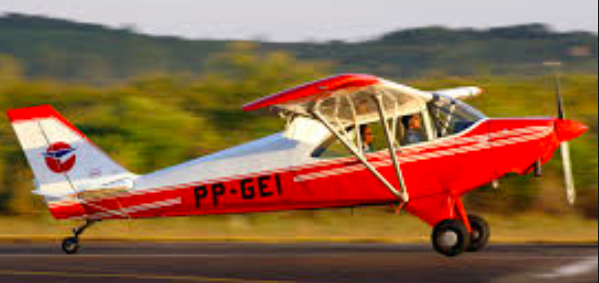

### The data for this project is from kaggle:
https://www.kaggle.com/paulovasconcellos/aeronautics-accidents-in-brazil#aircrafts.csv

### Context
For many years airplanes have been considered the second safest transport mean in the world - losing just to elevators. Traveling great distances in short time, those aircrafts have brought several advantaged for the world, both in commercial and regular application. Unfortunately, as any transport mean, aircrafts have their own count of tragedies. The last event envolving airplanes - to the publication date - was the accident envolving the brazilian soccer team Chapecoense and a LAMIA's aircraft, which was transporting them to Colombia for a Championship. This tragedy brought back discussions and controversies about aircraft's security and human capacity during aeronautics occurrences.

### Content
This dataset was available by CENIPA - Centro de Investigação e Prevenção de Acidentes aeronáuticos - or Aeronautical Accidents Investigation and Prevention Center. Such files contains informations about occurrences which envolved aircrafts in the last 10 years. You may access more updated data by visiting Brazilian Open Data's official website, or clicking in the download links below.

### Acknowledgements
This dataset is available for studies and analysis thanks to CENIPA.



## Importing Libraries

In [1]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import datetime

import warnings
warnings.filterwarnings(action='ignore')

# Part I:  Features Engineering

## Obtain and Scrub the Data 

In [2]:
# import the first file

from subprocess import check_output
print(check_output(['ls', 'aircrafts.csv']).decode('utf8'))

aircrafts.csv



In [3]:
# assign the data to a file called 'data'
# print out the shape (#rows, #columns), and the first 5 rows of the data

data = pd.read_csv('aircrafts.csv', na_values=['****', '***',''],
                        header=0,
                        encoding='latin-1')
print ('shape of the data -', data.shape)

data.head()

shape of the data - (2043, 23)


,Unnamed: 0,aircraft_id,occurrence_id,registration,operator_id,equipment,manufacturer,model,engine_type,engines_amount,...,registration_country,registration_category,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount,extraction_day
0,0,4,45602,PPGXE,241,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,...,BRAZIL,PRI,INSTRUCTION,SDPW,SDPW,UNKNOWN,INSTRUCTION,SUBSTANTIAL,NaN,2016-07-30
1,1,40,53551,PPGSZ,160,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,...,BRAZIL,PRI,INSTRUCTION,SBBP,SBBP,TAKEOFF,INSTRUCTION,LIGHT,NaN,2016-07-30
2,2,118,43721,PTCMT,1232,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,...,BRAZIL,TPX,AEROTAXI,NaN,NaN,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL,NaN,2016-07-30
3,3,130,35556,PTEQI,3992,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,...,BRAZIL,TPP,PRIVATE,SNDU,SBSL,RUN AFTER LANDING,PRIVATE,LIGHT,NaN,2016-07-30
4,4,191,32579,PPVMM,4365,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,...,BRAZIL,TPR,REGULAR,NaN,NaN,ASCENSION,REGULAR,NONE,NaN,2016-07-30


In [4]:
# import the second file

data2 = pd.read_csv('occurrences.csv',
                        na_values=['****', '***',''],
                        header=0,
                        encoding='latin-1'
                       )
print ('shape of the data -', data2.shape)

data2.head()

shape of the data - (2027, 20)


,Unnamed: 0,occurrence_id,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,report_number,published_report,publication_day,recommendation_amount,aircrafts_involved,takeoff,extraction_day
0,0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,SJOG,2013-05-05,11:00:00,UNKNOWN,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,1,50313,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,CACOAL,RO,BRAZIL,SSKW,2013-11-25,12:32:00,YES,SERIPA-7,FINISHED,NaN,1.0,2014-04-07,0,1,NaN,2016-07-30
2,2,34078,ACCIDENT,LOSS OF CONTROL ON THE GROUND,CEREJEIRAS,RO,BRAZIL,NaN,2008-08-07,15:10:00,YES,SERIPA-7,FINISHED,NaN,1.0,2016-07-07,0,1,1.0,2016-07-30
3,3,44988,ACCIDENT,SLOW LANDING,AMAJARI,RR,BRAZIL,NaN,2011-08-11,17:00:00,YES,SERIPA-7,FINISHED,NaN,1.0,2012-09-20,4,1,NaN,2016-07-30
4,4,38855,ACCIDENT,LOSS OF CONTROL IN THE AIR,ACEGUÁ,RS,BRAZIL,NaN,2009-12-28,17:30:00,YES,SERIPA-5,IN PROGRESS,UNDEFINED,NaN,NaN,0,1,NaN,2016-07-30


In [5]:
print ('aircrafts columns:', list(data.columns))

aircrafts columns: ['Unnamed: 0', 'aircraft_id', 'occurrence_id', 'registration', 'operator_id', 'equipment', 'manufacturer', 'model', 'engine_type', 'engines_amount', 'takeoff_max_weight (Lbs)', 'seatings_amount', 'year_manufacture', 'registration_country', 'registration_category', 'registration_aviation', 'origin_flight', 'destination_flight', 'operation_phase', 'type_operation', 'damage_level', 'fatalities_amount', 'extraction_day']


In [6]:
print ('occurrences columns:', list(data2.columns))

occurrences columns: ['Unnamed: 0', 'occurrence_id', 'classification', 'type of occurrence', 'localization', 'fu', 'country', 'aerodrome', 'occurrence_day', 'time', 'under_investigation', 'investigating_command', 'investigation_status', 'report_number', 'published_report', 'publication_day', 'recommendation_amount', 'aircrafts_involved', 'takeoff', 'extraction_day']


### Drop columns that are not relevant to this project

In [7]:
data = data.drop(['Unnamed: 0','occurrence_id','aircraft_id', 'registration'], axis=1)
data = data.drop(['operator_id','origin_flight', 'destination_flight', 'extraction_day'], axis=1)

In [8]:
data2 = data2.drop(['Unnamed: 0','localization','aerodrome', 'investigation_status', 'report_number'], axis=1)
data2 = data2.drop(['published_report','publication_day','under_investigation', 'occurrence_id'], axis=1)
data2 = data2.drop(['investigating_command','recommendation_amount','extraction_day','takeoff'], axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 15 columns):
equipment                   2042 non-null object
manufacturer                1933 non-null object
model                       2028 non-null object
engine_type                 2043 non-null object
engines_amount              2034 non-null float64
takeoff_max_weight (Lbs)    2043 non-null int64
seatings_amount             2025 non-null float64
year_manufacture            2039 non-null float64
registration_country        2031 non-null object
registration_category       2034 non-null object
registration_aviation       2043 non-null object
operation_phase             2042 non-null object
type_operation              2043 non-null object
damage_level                2043 non-null object
fatalities_amount           355 non-null float64
dtypes: float64(4), int64(1), object(10)
memory usage: 239.5+ KB


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 7 columns):
classification        2027 non-null object
type of occurrence    2027 non-null object
fu                    2025 non-null object
country               2027 non-null object
occurrence_day        2027 non-null object
time                  2027 non-null object
aircrafts_involved    2027 non-null int64
dtypes: int64(1), object(6)
memory usage: 110.9+ KB


In [11]:
#  look at some statistical information on the numerical features
# we can see the maximum and minimum values for some of the features and where the mean is

data.describe()

,engines_amount,takeoff_max_weight (Lbs),seatings_amount,year_manufacture,fatalities_amount
count,2034.000000,2043.000000,2025.000000,2039.000000,355.000000
mean,1.244346,11750.045032,8.928889,1902.494850,3.208451
std,0.483653,48511.565643,26.922299,402.024605,13.367108
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1860.000000,2.000000,1975.000000,1.000000
50%,1.000000,3600.000000,4.000000,1986.000000,2.000000
75%,2.000000,4750.000000,6.000000,1999.000000,2.000000
max,4.000000,630499.000000,301.000000,2015.000000,199.000000


In [12]:
data2.describe()

,aircrafts_involved
count,2027.000000
mean,1.007893
std,0.103906
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


### Right away we can tell that our data primarily is dealing with smaller planes / air vehicles

## Check for missing data

In [13]:
data.isnull().sum()

equipment                      1
manufacturer                 110
model                         15
engine_type                    0
engines_amount                 9
takeoff_max_weight (Lbs)       0
seatings_amount               18
year_manufacture               4
registration_country          12
registration_category          9
registration_aviation          0
operation_phase                1
type_operation                 0
damage_level                   0
fatalities_amount           1688
dtype: int64

In [14]:
data2.isnull().sum()

classification        0
type of occurrence    0
fu                    2
country               0
occurrence_day        0
time                  0
aircrafts_involved    0
dtype: int64

## Inspect the data for each of the features and eliminate or replace any missing values 

### Inspection of data set 'aircrafts' 

In [15]:
# list the unique values of the equipment column and how many occurrances of each

print ('equipment:' , data['equipment'].unique())
data['equipment'].value_counts(dropna=False)

equipment: ['AIRPLANE' 'HELICOPTER' 'GLIDER' 'ULTRALIGHT' 'AMPHIBIOUS' 'UNKNOWN'
 'AIRSHIP' nan]


AIRPLANE      1603
HELICOPTER     264
ULTRALIGHT     151
GLIDER          11
AMPHIBIOUS       6
UNKNOWN          5
AIRSHIP          2
NaN              1
Name: equipment, dtype: int64

In [16]:
# replace the 1 nan value with 'Unknown'
data['equipment'] = data['equipment'].fillna('UKNOWN')

#### Look at the rows with 'UNKNOWN' as the equipment type in order to determine if a type can be assigned based on other information for that occurrence

In [17]:
df1 = data[data['equipment'].str.contains("UNKNOWN")] 
print(df1) 

     equipment manufacturer         model engine_type  engines_amount  \
1931   UNKNOWN          NaN           NaN     UNKNOWN             0.0   
1944   UNKNOWN          NaN           NaN     UNKNOWN             0.0   
1954   UNKNOWN          NaN           NaN     UNKNOWN             0.0   
1984   UNKNOWN          NaN           NaN     UNKNOWN             0.0   
2041   UNKNOWN   WZQ-OKECIE  PZL 106 KRUK     UNKNOWN             NaN   

      takeoff_max_weight (Lbs)  seatings_amount  year_manufacture  \
1931                         0              0.0               0.0   
1944                         0              0.0               0.0   
1954                         0              0.0               0.0   
1984                       458              0.0            2008.0   
2041                      6613              NaN               NaN   

     registration_country registration_category registration_aviation  \
1931               BRAZIL                   PET          EXPERIMENTAL   


#### It doen't look like we have enough information to assign a specific value in these cases.

In [18]:

print ('manufacturer:' , data['manufacturer'].unique())

data['manufacturer'].value_counts(dropna=False)

manufacturer: ['NEIVA INDUSTRIA AERONAUTICA' 'BEECH AIRCRAFT' 'BOEING COMPANY'
 'CESSNA AIRCRAFT' 'PIPER AIRCRAFT' 'HELIBRAS' 'EMBRAER' 'XAVANTE'
 'AERO BOERO' 'INDÚSTRIA PARANAENSE DE ESTRUTURAS'
 'CIA AERONAUTICA PAULISTA' 'MAULE AIRCRAFT' 'BELL HELICOPTER' 'LEARJET'
 nan 'LAVIASA' 'NORTH AMERICAN' 'TWIN COMMANDER' 'ROBINSON HELICOPTER'
 'MITSUBISHI' 'AGUSTA' 'SIKORSKY AIRCRAFT' 'MOONEY AIRCRAFT'
 'AEROSPATIALE AND ALENIA' 'FABRICACAO PROPRIA' 'CHINCUL SACAIFI'
 'EUROCOPTER FRANCE' 'HUGHES HELICOPTER' 'AIRBUS INDUSTRIE'
 'EUROCOPTER DEUTSCHLAND' 'AIR TRACTOR' 'LET AIRCRAFT INDUSTRIES' 'FOKKER'
 'MCDONNELL DOUGLAS' 'AMERICAN CHAMPION' 'AEROMOT' 'RAYTHEON AIRCRAFT'
 'CIRRUS DESIGN' 'SCHWEIZER' 'CONSOLIDATED' 'HAWKER BEECHCRAFT' 'STEMME'
 'ANTONIO CESAR DA SILVA AMARAL' 'NILSON SULZBACH PERES' 'BRITTEN-NORMAN'
 'INPAER INDUSTRIA PAULISTA E AERONÁUTICA'
 'FLYER INDUSTRIA AERONAUTICA LTDA' 'TERRA AMBIENTAL E INCORPORADORA LTDA'
 'LAKE AIRCRAFT' 'AEROBRAVO LTDA' 'HENRIQUE HAMILTON CERQUEIR

NEIVA INDUSTRIA AERONAUTICA                388
CESSNA AIRCRAFT                            354
PIPER AIRCRAFT                             157
EMBRAER                                    155
AERO BOERO                                 126
ROBINSON HELICOPTER                        117
BEECH AIRCRAFT                             117
NaN                                        110
BELL HELICOPTER                             40
HELIBRAS                                    39
BOEING COMPANY                              34
EUROCOPTER FRANCE                           33
AIR TRACTOR                                 26
CIA AERONAUTICA PAULISTA                    24
CIRRUS DESIGN                               24
AIRBUS INDUSTRIE                            20
AEROSPATIALE AND ALENIA                     18
SIKORSKY AIRCRAFT                           13
AEROMOT                                     12
RAYTHEON AIRCRAFT                           12
AGUSTA                                      11
FOKKER       

In [19]:
# replace the nan values with 'Unknown'
data['manufacturer'] = data['manufacturer'].fillna('UKNOWN')

In [20]:
print ('model:' , data['model'].unique())

data['model'].value_counts(dropna=False)

model: ['56-C' '95-B55' 'EMB-721C' '737-241' '182P' 'EMB-711C' 'PA-28-140'
 'HB-350B' 'EMB-810C' 'A-122-B' 'PA-28R-200' 'AB-115' 'PA-30' '737-3K9'
 'EMB-820C NAVAJO' 'PA-18' '550' 'C90' 'KW1' '182M' 'AB-180' 'EMB-810D'
 'EMB-110P1' '56-C-1' 'EMB-820C CARAJA' '177B' 'CAP-4' '500' '172L' '402B'
 'PA-34-200' '56-B' '210K' '310Q' 'M-7-235' 'EMB-201' 'AS 350 BA' '210L'
 '206B' '182F' '412' 'AS 355 F2' 'EMB-711T' 'N35' '35' 'EMB-720D'
 'EMB-201A' '35A' 'EMB-202' 'EAGLE II' '208' 'EMB-721D' 'U206C' '650' '58'
 '150J' 'S550' '170A' 'EMB-200A' '182G' 'PA-25-235' 'A36' 'PA-31' 'A188B'
 'A-122-A' 'EMB-712' '400A' 'E55' '172D' '172A' 'AT-6D' '500-S' '200'
 'PA-39' '208B' 'EMB-110' 'U206E' 'EMB-710C' 'R22 BETA' 'F90' 'B90'
 'EMB-720C' '206L-3' 'R44' '310K' 'MU-2B-36A' 'PA-18-150' 'PA-25-260'
 'EMB-110P' 'T210N' 'NE-821' '95-C55' 'EMB-711ST' 'EMB-200' 'A109C'
 'S-76A' 'U206F' '25' 'M20M' '337A' 'ATR-42-300' 'V35B' 'P35' 'T210L'
 'V35' 'PA-32-300' 'PA-24-260' '180D' 'MU-2B-20' '170B' 'EMB-711B'
 'RAN

AB-115             111
EMB-202             78
EMB-201A            72
EMB-810C            61
EMB-810D            38
R44                 35
58                  34
EMB-202A            33
210L                31
152                 30
A188B               30
R22 BETA            28
EMB-711C            28
R44 II              28
206B                26
EMB-720D            25
EMB-201             25
CAP-4               24
PA-25-235           23
AS 350 B2           23
R22                 22
PA-34-220T          21
182P                19
EMB-712             18
EMB-721C            18
56-C                18
EMB-711ST           17
SR22                17
95-B55              17
EMB-720C            16
                  ... 
210D                 1
210H                 1
PA-31T2              1
P210N                1
RANS S-9             1
407                  1
CONQUEST             1
N-592-420            1
P2002 SIERRA RG      1
D35                  1
SG-ES COYOTE         1
MU-2B-36A            1
180E       

In [21]:
# replace the nan values with 'Unknown'
data['model'] = data['model'].fillna('UKNOWN')

In [22]:
data['engine_type'] = data['engine_type'].fillna('UKNOWN')
print ('engine_type:' , data['engine_type'].unique())

data['engine_type'].value_counts()

engine_type: ['PISTON' 'JET' 'TURBOSHAFT' 'TURBOPROP' 'WITHOUT TRACTION' 'UNKNOWN']


PISTON              1601
TURBOSHAFT           148
TURBOPROP            139
JET                  117
UNKNOWN               28
WITHOUT TRACTION      10
Name: engine_type, dtype: int64

In [23]:
print ('engines_amount:' , data['engines_amount'].unique())

data['engines_amount'].value_counts()

engines_amount: [ 1.  2.  0.  4.  3. nan]


1.0    1490
2.0     502
0.0      31
3.0       7
4.0       4
Name: engines_amount, dtype: int64

## *** need to check row of nan to see if the value can be figured out

In [24]:
# replace the nan values with 1 for the engines amount

data['engines_amount'] = data['engines_amount'].fillna(1)


# convert engines_amount to data type string so the 'nan' data can be dropped
#data['engines_amount'] = data['engines_amount'].astype(str)

# select only the data for where the engines_amount is not a nan value
#data = data[data['engines_amount']!= 'nan'] 

In [25]:
print ('registration aviation:' , data['registration_aviation'].unique())

data['registration_aviation'].value_counts()

registration aviation: ['INSTRUCTION' 'AEROTAXI' 'PRIVATE' 'REGULAR' 'DIRECT ADMINISTRATION'
 'MULTIPLE' 'AGRICULTURAL' 'EXPERIMENTAL' 'SPECIALIZED'
 'INDIRECT ADMINISTRATION' 'NOT REGULAR' 'UNKNOWN' 'HISTORIC']


PRIVATE                    760
INSTRUCTION                370
AEROTAXI                   272
EXPERIMENTAL               202
AGRICULTURAL               196
REGULAR                     85
SPECIALIZED                 64
DIRECT ADMINISTRATION       45
UNKNOWN                     25
MULTIPLE                    11
INDIRECT ADMINISTRATION      7
NOT REGULAR                  5
HISTORIC                     1
Name: registration_aviation, dtype: int64

In [26]:
print ('seatings_amount:' , data['seatings_amount'].unique())

data['seatings_amount'].value_counts(dropna=False)

seatings_amount: [  2.   6. 117.   4.   7.   3. 142.  10.   1.  21.   5.  15.  20.  11.
   8.  19.  13.  17.   9.  14.  50.   0. 125. 154.  34.  49. 184. 179.
 157. 153. 115. 301. 183. 151. 148. 156. 185. 188.  32.  52. 107. 166.
 242.  27.  71.  73. 240. 173.  54. 197. 194. 152.  12. 193.  75.  16.
  nan]


 2.0      444
 6.0      382
 1.0      328
 4.0      320
 7.0      133
 0.0       83
 5.0       52
 3.0       48
 10.0      42
 8.0       37
 11.0      27
NaN        18
 14.0      14
 21.0      11
 107.0      9
 184.0      8
 50.0       7
 9.0        7
 156.0      7
 17.0       5
 73.0       5
 20.0       5
 125.0      4
 153.0      3
 154.0      3
 15.0       3
 54.0       3
 19.0       2
 52.0       2
 193.0      2
 71.0       2
 242.0      2
 32.0       1
 117.0      1
 185.0      1
 179.0      1
 301.0      1
 75.0       1
 194.0      1
 166.0      1
 115.0      1
 197.0      1
 142.0      1
 173.0      1
 188.0      1
 13.0       1
 183.0      1
 157.0      1
 16.0       1
 12.0       1
 152.0      1
 34.0       1
 49.0       1
 240.0      1
 148.0      1
 151.0      1
 27.0       1
Name: seatings_amount, dtype: int64

In [27]:
# convert seatings_amount to data type string so the 'nan' data can be dropped
data['seatings_amount'] = data['seatings_amount'].astype(str)

# select only the data for where the seatings_amount is not a nan value
data = data[data['seatings_amount']!= 'nan'] 

In [28]:
print ('year_manufacture:' , data['year_manufacture'].unique())

data['year_manufacture'].value_counts(dropna=False)

year_manufacture: [1962. 1960. 1966. 1979. 1975. 1974. 1977. 1973. 1983. 1982. 1978. 1988.
 1990. 1976. 1951. 1981. 1980. 1989. 1969. 1986. 1970. 1947. 1972. 1971.
 1991. 1963. 1940. 1992. 1961.    0. 1993. 1994. 1987. 1968. 1950. 1964.
 1984. 1995. 1985. 1942. 1953. 2001. 1946. 1997. 1948. 1996. 1967. 1952.
 1956. 1945. 1965. 1999. 2004. 2000. 2005. 1998. 2003. 2006. 1958. 2002.
 2007. 1954. 1949. 2008. 2009. 2010. 1959. 1957. 1936. 2011. 1955. 2012.
 2013.   nan]


 0.0       84
 1980.0    82
 1976.0    81
 1992.0    80
 1974.0    69
 1973.0    65
 1977.0    63
 1993.0    61
 1979.0    61
 1981.0    60
 2007.0    57
 1990.0    53
 2008.0    50
 2010.0    45
 1978.0    44
 1998.0    42
 1991.0    42
 2012.0    41
 2006.0    41
 1975.0    39
 1997.0    38
 2011.0    37
 1982.0    37
 2009.0    37
 2005.0    36
 1988.0    35
 2001.0    34
 2004.0    34
 1995.0    31
 1972.0    29
           ..
 1968.0    16
 1984.0    16
 2013.0    14
 1961.0    13
 1946.0    12
 1966.0    12
 1996.0    11
 1963.0    11
 1960.0    11
 1947.0     9
 1965.0     7
 1948.0     6
 1964.0     5
 1950.0     5
 1967.0     5
 1951.0     5
 1958.0     3
 1954.0     3
 1949.0     3
 1953.0     3
 1956.0     2
 1957.0     2
 1940.0     2
 1959.0     1
 1955.0     1
 1945.0     1
NaN         1
 1936.0     1
 1952.0     1
 1942.0     1
Name: year_manufacture, Length: 74, dtype: int64

In [29]:
# convert year_manufacture to data type string so the 'nan' data can be dropped
data['year_manufacture'] = data['year_manufacture'].astype(str)

# select only the data for where the engines_amount is not a nan value
data = data[data['year_manufacture']!= 'nan'] 

In [30]:
print ('registration_country:' , data['registration_country'].unique())

data['registration_country'].value_counts(dropna=False)

registration_country: ['BRAZIL' 'USA' 'UNKNOWN' nan 'FRENCH' 'SPAIN' 'SOUTH AFRICA' 'URUGUAY'
 'RUSSIA' 'POLAND' 'GERMAN']


BRAZIL          1987
USA               20
NaN                9
RUSSIA             1
UNKNOWN            1
SOUTH AFRICA       1
GERMAN             1
POLAND             1
SPAIN              1
URUGUAY            1
FRENCH             1
Name: registration_country, dtype: int64

In [31]:
data['registration_country'] = data['registration_country'].fillna('UKNOWN')

In [32]:
print ('registration_category:' , data['registration_category'].unique())

data['registration_category'].value_counts(dropna=False)

registration_category: ['PRI' 'TPX' 'TPP' 'TPR' 'ADE' 'M14' 'ADD' 'SAE-AG' 'PET' 'SAE' 'PIN'
 'SAE-AL' 'SAE-AP' 'ADF' 'AIF' 'S00' 'TPN' 'AID' 'PEX' nan 'PUH' 'D07'
 'M24' 'EXT']


TPP       752
PRI       358
TPX       272
SAE-AG    195
PET       187
TPR        85
SAE        57
ADE        38
EXT        13
PIN        11
PEX         9
NaN         9
AIF         6
S00         5
TPN         5
ADF         5
SAE-AP      4
M14         4
SAE-AL      3
ADD         2
AID         1
PUH         1
D07         1
M24         1
Name: registration_category, dtype: int64

### I couldn't find any relevant information on the meaning of these categories so I am dropping the column for now

In [33]:
data = data.drop(['registration_category'], axis=1)

In [34]:
print ('operation_phase:' , data['operation_phase'].unique())

data['operation_phase'].value_counts(dropna=False)

operation_phase: ['UNKNOWN' 'TAKEOFF' 'RUN AFTER LANDING' 'ASCENSION' 'MANEUVER' 'HOVERING'
 'FINAL APPROXIMATION' 'RUSH ON THE GROUND' 'LANDING' 'DESCEND' 'CRUISE'
 'TRAFFIC CIRCUIT' 'TAXI' 'RUSH IN THE AIR' 'SPECIALIZED' 'ANOTHER PHASE'
 'LOW ALTITUDE NAVIGATION' 'FINAL STRETCH' 'ENGINE START'
 'ENGINE OR ROTOR CHECKING' 'VERTICAL TAKEOFF' 'GROUND OPERATION'
 'PARKING' nan]


LANDING                     388
TAKEOFF                     348
CRUISE                      232
RUN AFTER LANDING           188
SPECIALIZED                 115
UNKNOWN                     103
ASCENSION                   100
MANEUVER                     98
FINAL APPROXIMATION          70
DESCEND                      67
ANOTHER PHASE                60
LOW ALTITUDE NAVIGATION      58
TRAFFIC CIRCUIT              53
TAXI                         40
RUSH ON THE GROUND           29
RUSH IN THE AIR              17
ENGINE START                 13
FINAL STRETCH                12
HOVERING                     10
PARKING                       9
GROUND OPERATION              6
VERTICAL TAKEOFF              4
ENGINE OR ROTOR CHECKING      3
NaN                           1
Name: operation_phase, dtype: int64

In [35]:
# replace the 1 nan value with 'Unknown'
data['operation_phase'] = data['operation_phase'].fillna('UNKNOWN')

In [36]:
print ('type operation:' , data['type_operation'].unique())

data['type_operation'].value_counts()

type operation: ['INSTRUCTION' 'AEROTAXI' 'PRIVATE' 'REGULAR' 'POLICIAL' 'AGRICULTURAL'
 'EXPERIMENTAL' 'SPECIALIZED' 'NOT REGULAR' 'UNKNOWN']


PRIVATE         760
INSTRUCTION     365
AEROTAXI        273
AGRICULTURAL    263
EXPERIMENTAL    153
REGULAR          91
SPECIALIZED      42
POLICIAL         37
UNKNOWN          26
NOT REGULAR      14
Name: type_operation, dtype: int64

In [37]:
print ('fatalitis:' , data['fatalities_amount'].unique())

data['fatalities_amount'].value_counts(dropna=False)

fatalitis: [ nan   2.   6.  10.  24.   3.   1.   4.   5.  19. 199.   7. 154.   8.
  14.  16.]


NaN       1679
 1.0       158
 2.0       101
 3.0        32
 4.0        23
 5.0        12
 6.0         6
 8.0         3
 7.0         3
 199.0       1
 154.0       1
 16.0        1
 14.0        1
 19.0        1
 24.0        1
 10.0        1
Name: fatalities_amount, dtype: int64

### There is a lot of missing values for the fatalities feature.  I will look at this feature for EDA but will essentially drop it for the rest of the project.

In [38]:
data_fatal = data.copy()

# drop fatalities from the original data now that we have a copy
data = data.drop(['fatalities_amount'], axis=1)


# convert fatalities_amount to data type string so the 'nan' data can be dropped
data_fatal['fatalities_amount'] = data_fatal['fatalities_amount'].astype(str)

# select only the data for where the seatings_amount is not a nan value
data_fatal = data_fatal[data_fatal['fatalities_amount'] != 'nan'] 

data_fatal['fatalities_amount'] = data_fatal['fatalities_amount'].astype(float)
data_fatal['fatalities_amount'] = data_fatal['fatalities_amount'].astype(int)

In [39]:
data_fatal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 23 to 1992
Data columns (total 14 columns):
equipment                   345 non-null object
manufacturer                345 non-null object
model                       345 non-null object
engine_type                 345 non-null object
engines_amount              345 non-null float64
takeoff_max_weight (Lbs)    345 non-null int64
seatings_amount             345 non-null object
year_manufacture            345 non-null object
registration_country        345 non-null object
registration_aviation       345 non-null object
operation_phase             345 non-null object
type_operation              345 non-null object
damage_level                345 non-null object
fatalities_amount           345 non-null int64
dtypes: float64(1), int64(2), object(11)
memory usage: 40.4+ KB


In [40]:
print ('damage level:' , data['damage_level'].unique())

data['damage_level'].value_counts()

damage level: ['SUBSTANTIAL' 'LIGHT' 'NONE' 'UNKNOWN' 'DESTROYED']


SUBSTANTIAL    1184
DESTROYED       345
LIGHT           260
NONE            166
UNKNOWN          69
Name: damage_level, dtype: int64

In [41]:
# check to verify there are no more null values
data.isnull().sum()

equipment                   0
manufacturer                0
model                       0
engine_type                 0
engines_amount              0
takeoff_max_weight (Lbs)    0
seatings_amount             0
year_manufacture            0
registration_country        0
registration_aviation       0
operation_phase             0
type_operation              0
damage_level                0
dtype: int64

#### Some of the features need to be converted to integer data type

In [42]:
# make the year manufacture an integer category
# convert other columns to appropriate data type category

data['engines_amount'] = data['engines_amount'].astype(float)
data['engines_amount'] = data['engines_amount'].astype(int)
data['seatings_amount'] = data['seatings_amount'].astype(float)
data['seatings_amount'] = data['seatings_amount'].astype(int)
data['year_manufacture'] = data['year_manufacture'].astype(float)
data['year_manufacture'] = data['year_manufacture'].astype(int)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 2042
Data columns (total 13 columns):
equipment                   2024 non-null object
manufacturer                2024 non-null object
model                       2024 non-null object
engine_type                 2024 non-null object
engines_amount              2024 non-null int64
takeoff_max_weight (Lbs)    2024 non-null int64
seatings_amount             2024 non-null int64
year_manufacture            2024 non-null int64
registration_country        2024 non-null object
registration_aviation       2024 non-null object
operation_phase             2024 non-null object
type_operation              2024 non-null object
damage_level                2024 non-null object
dtypes: int64(4), object(9)
memory usage: 221.4+ KB


### Inspection of data set 'occurrences'

In [44]:
###########   Example code  ####################################
# Get the count of the ID
#counts = axs['ID'].value_counts()

# Select the items where the ID count is less than 3 and remove them
#axs = axs[~axs['ID'].isin(counts[counts < 3].index)]

# Show info
#axs.info()
##################################################

In [45]:
data2.head(3)

,classification,type of occurrence,fu,country,occurrence_day,time,aircrafts_involved
0,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,RO,BRAZIL,2013-05-05,11:00:00,1
1,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,RO,BRAZIL,2013-11-25,12:32:00,1
2,ACCIDENT,LOSS OF CONTROL ON THE GROUND,RO,BRAZIL,2008-08-07,15:10:00,1


In [46]:
list(data2.columns)

['classification',
 'type of occurrence',
 'fu',
 'country',
 'occurrence_day',
 'time',
 'aircrafts_involved']

In [47]:
data2.isnull().sum()  ###### why do I still have 2 null values here??

classification        0
type of occurrence    0
fu                    2
country               0
occurrence_day        0
time                  0
aircrafts_involved    0
dtype: int64

In [48]:
print ('classification:' , data2['classification'].unique())

data2['classification'].value_counts()

classification: ['ACCIDENT' 'SERIOUS INCIDENT']


ACCIDENT            1475
SERIOUS INCIDENT     552
Name: classification, dtype: int64

In [49]:
print ('type of occurrence:' , data2['type of occurrence'].unique())

data2['type of occurrence'].value_counts()

type of occurrence: ['ENGINE FAILURE DURING THE FLIGHT' 'LANDING WITHOUT LANDING GEAR'
 'LOSS OF CONTROL ON THE GROUND' 'SLOW LANDING'
 'LOSS OF CONTROL IN THE AIR' 'UNKNOWN' 'ABOUT LANDING GEAR'
 'TERRAIN COLLISION' 'TRACK INCURSION'
 'METEOROLOGICAL PHENOMENOM IN THE AIR' 'HARD LANDING' 'ANOTHER TYPES'
 'ABOUT ROTOR' 'SYSTEM / COMPONENT FAILURE'
 'COLLISION AGAINST OBSTACLE DURING THE FLIGHT'
 'ABOUT WINDOWS / DOORS / WINDSHIELD'
 'LOSS OF COMPONENT DURING THE FLIGHT'
 'COLLISION AGAINST OBSTACLE ON THE GROUND' 'FIRE DURING THE FLIGHT'
 'LANDING BEFORE THE TRACK AREA' 'LOAD LAUNCH'
 'EXPLOSIVE / NOT INTENTIONAL DECOMPRESSION'
 'AIRCRAFTS COLLISION IN THE AIR' 'SPATIAL UNAWARENESS'
 'LANDING ON UNPREDICTABLE PLACE' 'TIRE BURST' 'FUEL STARVATION'
 'COMPONENT LOSS ON THE GROUND' 'ABOUT PROPELLER' 'LOW ALTITUDE MANEUVERS'
 'FIRE ON THE GROUND' 'VEHICLE COLLISION AGAINST AIRCRAFT'
 'FOD - DAMAGE CAUSED BY UNKNOWN OBJECT'
 'COLLISION DURING THE FLIGHT AGAINST TOWED OBJECT'
 'AIRCRAFT HIT B

ENGINE FAILURE DURING THE FLIGHT                    377
LOSS OF CONTROL ON THE GROUND                       325
LOSS OF CONTROL IN THE AIR                          310
COLLISION AGAINST OBSTACLE DURING THE FLIGHT        142
ABOUT LANDING GEAR                                  130
ANOTHER TYPES                                        87
FUEL STARVATION                                      74
SYSTEM / COMPONENT FAILURE                           61
UNKNOWN                                              57
LANDING WITHOUT LANDING GEAR                         54
LANDING ON UNPREDICTABLE PLACE                       44
HARD LANDING                                         40
COLLISION AGAINST OBSTACLE ON THE GROUND             40
SLOW LANDING                                         30
LOSS OF COMPONENT DURING THE FLIGHT                  27
METEOROLOGICAL PHENOMENOM IN THE AIR                 27
TERRAIN COLLISION                                    21
LOW ALTITUDE MANEUVERS                          

In [50]:
print ('fu:' , data2['fu'].unique())

data2['fu'].value_counts()

fu: ['RO' 'RR' 'RS' 'GO' 'RJ' 'ES' 'AL' 'DF' 'AC' 'MT' 'AM' 'PI' 'MS' 'SP'
 'MA' 'AP' 'PA' 'SE' 'PR' 'CE' 'BA' 'MG' 'PE' 'RN' 'PB' 'SC' 'TO' nan 'EX']


SP    434
RS    169
PR    154
MT    153
MG    152
GO    141
RJ    120
PA    119
BA     83
AM     81
MS     72
SC     58
MA     40
TO     30
DF     30
PE     29
RR     25
CE     25
PI     20
ES     16
AC     14
RO     14
AL     12
EX      8
SE      7
RN      7
PB      6
AP      6
Name: fu, dtype: int64

In [51]:
# select only the data for where the fu (state) is not a nan value
data2 = data2[data2['fu'] != 'nan'] 

In [52]:
# pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
# efficient way to extract year from string format date

data2['year'] = pd.DatetimeIndex(data2['occurrence_day']).year
data2.head()


,classification,type of occurrence,fu,country,occurrence_day,time,aircrafts_involved,year
0,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,RO,BRAZIL,2013-05-05,11:00:00,1,2013
1,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,RO,BRAZIL,2013-11-25,12:32:00,1,2013
2,ACCIDENT,LOSS OF CONTROL ON THE GROUND,RO,BRAZIL,2008-08-07,15:10:00,1,2008
3,ACCIDENT,SLOW LANDING,RR,BRAZIL,2011-08-11,17:00:00,1,2011
4,ACCIDENT,LOSS OF CONTROL IN THE AIR,RS,BRAZIL,2009-12-28,17:30:00,1,2009


In [53]:
print ('country:' , data2['country'].unique())

data2['country'].value_counts(dropna=False)

country: ['BRAZIL' 'PARAGUAY' 'URUGUAY' 'COLOMBIA' 'PERU' 'ARGENTINA' 'ENGLAND']


BRAZIL       2019
PARAGUAY        2
URUGUAY         2
COLOMBIA        1
PERU            1
ENGLAND         1
ARGENTINA       1
Name: country, dtype: int64

In [54]:
print ('aircrafts_involved:' , data2['aircrafts_involved'].unique())

data2['aircrafts_involved'].value_counts(dropna=False)

aircrafts_involved: [1 2 4]


1    2013
2      13
4       1
Name: aircrafts_involved, dtype: int64

In [55]:
data2.isnull().sum()

classification        0
type of occurrence    0
fu                    2
country               0
occurrence_day        0
time                  0
aircrafts_involved    0
year                  0
dtype: int64

#### There are still nan values in the 'fu' column

# Part II: Exploratory Data Analysis

Text(0.5, 1.0, 'Number of Accidents per Year')

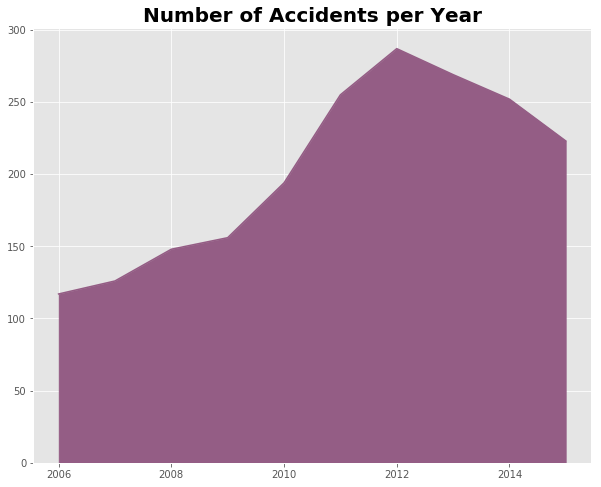

In [56]:
Year = data2['year'].value_counts().sort_index()
Year.plot.area(figsize=(10,8), color='#945d85')
plt.title('Number of Accidents per Year', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Accidents by Aircraft Type')

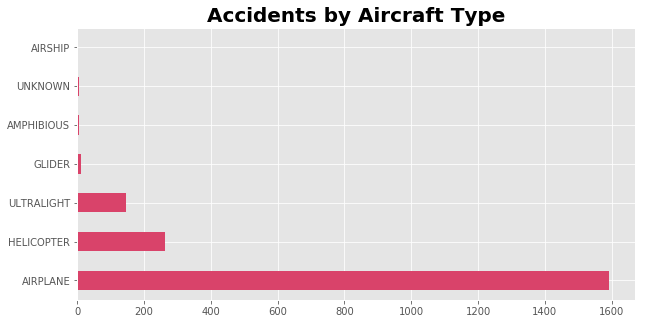

In [57]:
# graph of accidents by equipment type
equip = data['equipment'].value_counts()
equip = equip.sort_values(ascending=False)

equip.plot.barh(color='#d9436a', figsize=(10,5))
plt.title('Accidents by Aircraft Type', fontsize=20, fontweight='bold')

https://github.com/emilypfeifer/sitcoms/blob/master/2_sitcoms_EDA.ipynb
[10]

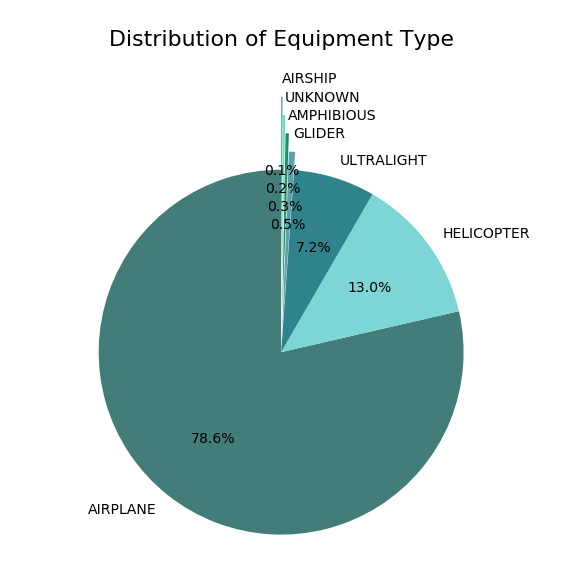

In [59]:
# Create a list of colors (from iWantHue)
colors = ["#437d79", "#7ed5d6", '#30838c','#5aa1ae', "#2a8a65", "#5de6bb",'#30838c']

# Create a pie chart
fig1, ax1 = plt.subplots(figsize = (8, 8)) #creating pie chart, setting size

patches, texts, autotext = ax1.pie(
    # using type of equipment
    equip.values,
    # with the labels being equipment names
    labels=equip.index,
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0, .1, .2, .3, .4),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    #fontsize
    textprops={'fontsize': 14}
    )

# View the plot drop above
ax1.axis('equal')
plt.title('\n Distribution of Equipment Type \n', fontsize = 22)
# View the plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Accidents by Engine Type')

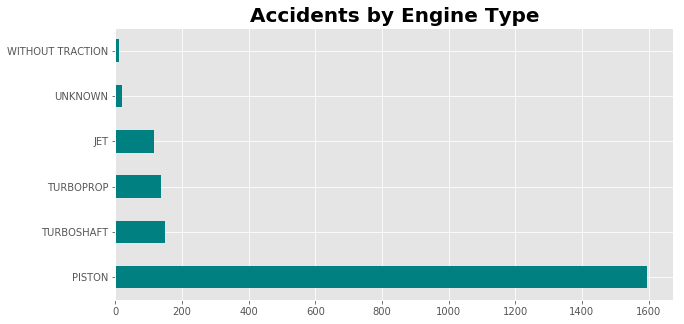

In [60]:
#engine type
engine = data['engine_type'].value_counts()
engine= engine.sort_values(ascending=False)

engine.plot.barh(color='teal', figsize=(10,5))
plt.title('Accidents by Engine Type', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Accidents by Phase of Operation')

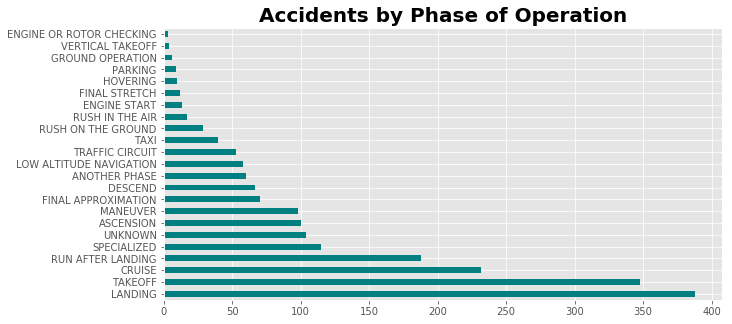

In [61]:
# operation phase

phase = data['operation_phase'].value_counts()
phase = phase.sort_values(ascending=False)

phase.plot.barh(color='teal', figsize=(10,5))
plt.title('Accidents by Phase of Operation', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Accidents by Operation Type')

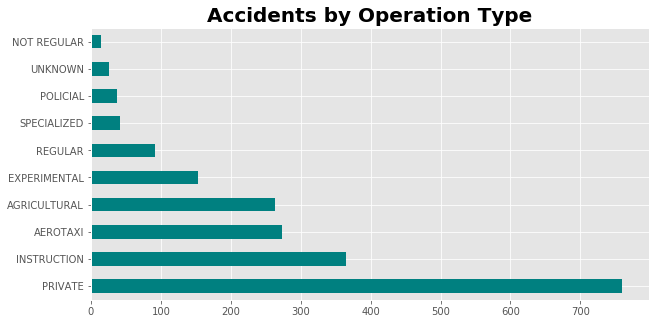

In [62]:
# type of operation

type_op = data['type_operation'].value_counts()
type_op = type_op.sort_values(ascending=False)

type_op.plot.barh(color='teal', figsize=(10,5))
plt.title('Accidents by Operation Type', fontsize=20, fontweight='bold')

In [ ]:
# USE THIS IN THE VISUALIZATION SECTION - DON'T ELIMINATE DATA HERE
# MAKE A COPY OF THE DATASET


# select the manufacturers that have 10 or more occurrances

manufacturers = data['manufacturer'].value_counts()
data = data[data['manufacturer'].isin(manufacturers.index[manufacturers >=10]).values]

Text(0.5, 1.0, 'Number of Seats on the Plane/Equipment')

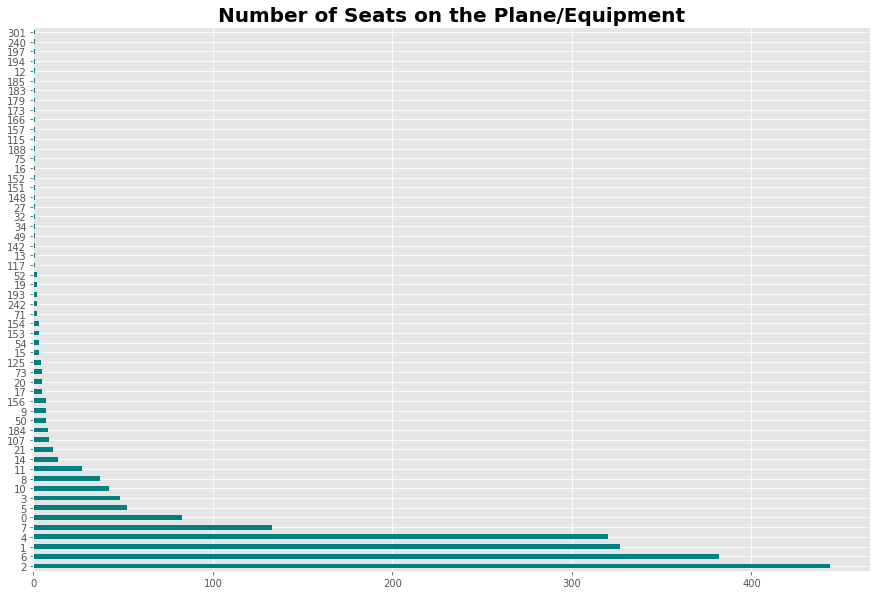

In [63]:
seats = data['seatings_amount'].value_counts()
seats= seats.sort_values(ascending=False)

seats.plot.barh(color='teal', figsize=(15,10))
plt.title('Number of Seats on the Plane/Equipment', fontsize=20, fontweight='bold')

# Part III:  Build Machine Learning Models

### Preprocess the data

In [64]:
data.shape

(2024, 13)

In [65]:
data_by_damage = data.groupby('damage_level')  # group data by damage level
levels = list(data['damage_level'].unique())  # list of damage categories
print ('damage levels:',levels)

damage levels: ['SUBSTANTIAL', 'LIGHT', 'NONE', 'UNKNOWN', 'DESTROYED']


#### Replace the unknown values with the value of 'substantial' since statistically this is the most frequent value of damage (the mode)

In [66]:
data['damage_level'] = (data['damage_level'].replace('UNKNOWN', 'SUBSTANTIAL')).astype('str')

Stackoverflow:
In most cases getting rid of infinite and null values solve this problem.

get rid of infinite values.

df.replace([np.inf, -np.inf], np.nan, inplace=True)
get rid of null values the way you like, specific value such as 999, mean, or create your own function to impute missing values

df.fillna(999, inplace=True)
or

df.fillna(df.mean(), inplace=True)

In [67]:
data['damage_level'] = data['damage_level'].fillna('SUBSTANTIAL')

In [68]:
# Encode the labels for damage level - use LabelEncoder for target variable

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['damage_level'] = pd.DataFrame(le.fit_transform(data['damage_level']))

print(data.head(3))

# for more information see documentation at: 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

  equipment                 manufacturer   model engine_type  engines_amount  \
0  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA    56-C      PISTON               1   
1  AIRPLANE  NEIVA INDUSTRIA AERONAUTICA    56-C      PISTON               1   
2  AIRPLANE               BEECH AIRCRAFT  95-B55      PISTON               2   

   takeoff_max_weight (Lbs)  seatings_amount  year_manufacture  \
0                      1455                2              1962   
1                      1455                2              1960   
2                      5092                6              1966   

  registration_country registration_aviation    operation_phase  \
0               BRAZIL           INSTRUCTION            UNKNOWN   
1               BRAZIL           INSTRUCTION            TAKEOFF   
2               BRAZIL              AEROTAXI  RUN AFTER LANDING   

  type_operation  damage_level  
0    INSTRUCTION           3.0  
1    INSTRUCTION           1.0  
2       AEROTAXI           3.0  


In [69]:
np.isnan(data['damage_level']).sum()

3

In [70]:
# to see where the nan values are
np.where(np.isnan(data['damage_level']))

(array([2021, 2022, 2023]),)

In [71]:
data.tail()

,equipment,manufacturer,model,engine_type,engines_amount,takeoff_max_weight (Lbs),seatings_amount,year_manufacture,registration_country,registration_aviation,operation_phase,type_operation,damage_level
2022,AIRPLANE,CESSNA AIRCRAFT,TU206G,PISTON,1,3600,0,0,UKNOWN,PRIVATE,UNKNOWN,PRIVATE,1.0
2023,AIRPLANE,CESSNA AIRCRAFT,402B,PISTON,2,6849,0,0,URUGUAY,AEROTAXI,LANDING,AEROTAXI,0.0
2024,AIRSHIP,MAULE AIRCRAFT,UKNOWN,PISTON,1,551,0,0,RUSSIA,PRIVATE,CRUISE,PRIVATE,NaN
2025,AIRSHIP,MAULE AIRCRAFT,UKNOWN,PISTON,1,551,0,0,POLAND,PRIVATE,CRUISE,PRIVATE,NaN
2042,AIRPLANE,PIPER AIRCRAFT,PA34,PISTON,2,0,0,0,GERMAN,UNKNOWN,UNKNOWN,UNKNOWN,NaN


In [72]:
data = data.iloc[0:-3, :]

In [73]:
data.tail()

,equipment,manufacturer,model,engine_type,engines_amount,takeoff_max_weight (Lbs),seatings_amount,year_manufacture,registration_country,registration_aviation,operation_phase,type_operation,damage_level
2019,AIRPLANE,ROCKWELL,114,UNKNOWN,1,3139,0,0,USA,PRIVATE,LANDING,PRIVATE,0.0
2020,HELICOPTER,BELL HELICOPTER,206,TURBOSHAFT,1,3298,0,0,USA,PRIVATE,LANDING,UNKNOWN,3.0
2021,AIRPLANE,CESSNA AIRCRAFT,210M,PISTON,1,3800,0,1976,UKNOWN,UNKNOWN,LANDING,UNKNOWN,1.0
2022,AIRPLANE,CESSNA AIRCRAFT,TU206G,PISTON,1,3600,0,0,UKNOWN,PRIVATE,UNKNOWN,PRIVATE,1.0
2023,AIRPLANE,CESSNA AIRCRAFT,402B,PISTON,2,6849,0,0,URUGUAY,AEROTAXI,LANDING,AEROTAXI,0.0


## I.  Logistic Regression Model
### Process:

* Normalization
* Define X and y
* Train-Test Split
* Fit a Model
* Predict
* Generate a Confusion Matrix
* Calculate Evaluation Metrics

### Step 1:  Define X and y

#### First we have to create dummy variables for the features we are using before using them to define X and y

In [74]:
x_feats = ['equipment', 'engine_type', 'registration_aviation', 'operation_phase', 'type_operation']
X = pd.get_dummies(data[x_feats])

y = data['damage_level']

### Make sure all nan values are eliminated from the data

In [75]:
np.isnan(X).sum()

equipment_AIRPLANE                               0
equipment_AMPHIBIOUS                             0
equipment_GLIDER                                 0
equipment_HELICOPTER                             0
equipment_ULTRALIGHT                             0
equipment_UNKNOWN                                0
engine_type_JET                                  0
engine_type_PISTON                               0
engine_type_TURBOPROP                            0
engine_type_TURBOSHAFT                           0
engine_type_UNKNOWN                              0
engine_type_WITHOUT TRACTION                     0
registration_aviation_AEROTAXI                   0
registration_aviation_AGRICULTURAL               0
registration_aviation_DIRECT ADMINISTRATION      0
registration_aviation_EXPERIMENTAL               0
registration_aviation_HISTORIC                   0
registration_aviation_INDIRECT ADMINISTRATION    0
registration_aviation_INSTRUCTION                0
registration_aviation_MULTIPLE 

In [76]:
np.isnan(y).sum()

0

### Normalization is not needed for this dataset so we can proceed to the Train Test Split phase


### Step 2: Train-Test Split

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1212, 58) (809, 58) (1212,) (809,)


### Step 3:  Fit a Model

In [78]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12)
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

### Step 4: Predict

In [84]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [85]:
# residuals are the values between the actual y value and the predicted y value
# check the residuals for the train data

residuals = np.abs(y_train - y_hat_train)

print (pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    779
3.0    194
2.0    153
1.0     86
Name: damage_level, dtype: int64
0.0    0.642739
3.0    0.160066
2.0    0.126238
1.0    0.070957
Name: damage_level, dtype: float64


In [86]:
# now check the residuals for the test data

residuals = np.abs(y_test - y_hat_test)

print (pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    500
3.0    136
2.0    106
1.0     67
Name: damage_level, dtype: int64
0.0    0.618047
3.0    0.168109
2.0    0.131026
1.0    0.082818
Name: damage_level, dtype: float64


### The classifier was 62.8% accurate with the training data and 63.2% with the test data

When the test data was categorized, 499 entries were correctly labeled. This represents about 63% of the test data.

With a confusion matrix, we can see which genres were more often correctly labeled, as well as those that were mislabeled the majority of the time.

### Step 6.  Generate a Confusion Matrix

"A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.
It allows easy identification of confusion between classes e.g. one class is commonly mislabeled as the other. Most performance measures are computed from the confusion matrix."
geeksforgeeks.org/confusion-matrix-machine-learning/

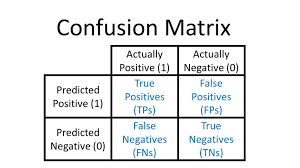

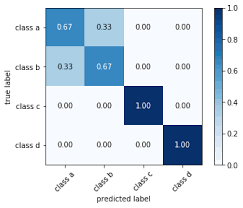

The results from the confusion matrix enable us to calculate different evaluation metrics for our classification problem. These metrics include precision, recall, accuracy, and the F-1 score.

For more of an explanation of a confusion matrix, visit:
https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

See https://www.youtube.com/watch?v=8Oog7TXHvFY at 24:30 to learn about reading a confusion matrix for a multi-categorical classification model

In [87]:
# generate a multi-categorical confusion matrix (code adapted from lab dsc-3-27-08)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_hat_test)
cm

array([[ 21,   2,   4, 119],
       [  4,   0,   4,  91],
       [  6,   1,  16,  48],
       [ 17,   5,   8, 463]])

# EDIT
The true labels run down the left side of the matrix, genres 0 thru 3
The predicted labels run across the top (or bottom) of the matrix.
The diagonal numbers of the matrix represents how many times the true value was predicted correctly.  As you can see, the model did only a fair job predicting the correct genre.  In the case of genre 3 (disco), it was classified 16 times as genre 7 (pop).  If we look at the reverse case, genre 7 was never classified as genre 3.  Let's take a look at this more visually.

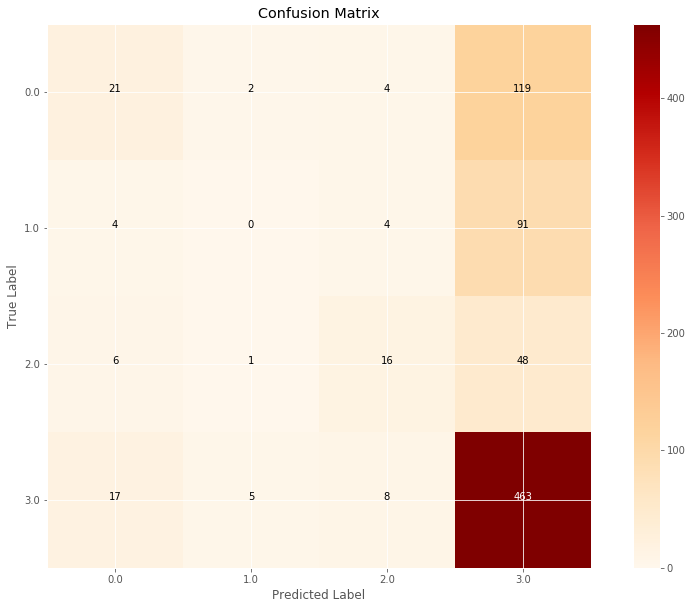

In [88]:
# visualize the confusion matrix

import numpy as np
import itertools
import matplotlib.pyplot as plt
% matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(15,10))  # added to change figure size
    plt.imshow(cf, cmap=plt.cm.OrRd)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

show_cf(y_test, y_hat_test)

# EDIT
Ideally, the diagonal of this matrix would be shaded darker than the areas above or below it. This would mean that the true label was predicted correctly the majority of the time. Looking at the diagonal, we can see that ............. were correctly classified the most, whereas ................ were classified incorrectly the most.

### Calculate the Evaluation Metrics

In [89]:
from sklearn.metrics import classification_report, accuracy_score

In [90]:
print (classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

         0.0       0.44      0.14      0.22       146
         1.0       0.00      0.00      0.00        99
         2.0       0.50      0.23      0.31        71
         3.0       0.64      0.94      0.76       493

   micro avg       0.62      0.62      0.62       809
   macro avg       0.39      0.33      0.32       809
weighted avg       0.51      0.62      0.53       809



In [91]:
print ('Accuracy Score:', accuracy_score(y_test, y_hat_test))

Accuracy Score: 0.6180469715698393


The F1-score penalizes models heavily if it skews too hard towards either precision or recall. For this reason, F1-score is generally the most used metric for describing the performance of a model.
However, because we are dealing with airplane accidents, it is more important that our model be accurate.

### Which Metric to Use?
The metrics that are most important to a project will often be dependent on the business use or goals for that model. 
In general, it is a good idea to calculate any and all relevant metrics. In most classification tasks, you don't know which model will perform best when you start. The common workflow is to train each different type of classifier, and select the best by comparing the performance of each. It's common to make tables like the one below, and highlight the best peformer for each metric:

![image.png](attachment:image.png)

The above taken from Mod3 Section27 Evaluation Metrics lesson

# EDIT
Overall, the logistical regresson model performed fair at best.  It did better with some genres than others but choosing a deep learning model should produce a better result.

### Using a Pipeline with Logistic Regression

Pipelines are extremely useful tools to write clean and manageable code for machine learning. Recall how we start preparing our data set: we want to clean our data, transform it, potentially use feature selection, and then run a machine learning algorithm. All of this can be done in one procedure using a pipeline.

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipe_linreg = Pipeline([('pca', PCA(n_components=25, random_state=123)),
                 ('clf', LogisticRegression(random_state=123))])

# fit the pipeline
pipe_linreg.fit(X_train, y_train)

# print result
print (pipe_linreg.score(X_test, y_test))

0.6205191594561187


### Let's explore some deep learning models to see if better performance can be achieved

## II.  Deep Learning Model

In [93]:
features = ['equipment', 'engine_type', 'registration_aviation', 'operation_phase', 'type_operation']

print(features)
data[features].head()

['equipment', 'engine_type', 'registration_aviation', 'operation_phase', 'type_operation']


,equipment,engine_type,registration_aviation,operation_phase,type_operation
0,AIRPLANE,PISTON,INSTRUCTION,UNKNOWN,INSTRUCTION
1,AIRPLANE,PISTON,INSTRUCTION,TAKEOFF,INSTRUCTION
2,AIRPLANE,PISTON,AEROTAXI,RUN AFTER LANDING,AEROTAXI
3,AIRPLANE,PISTON,PRIVATE,RUN AFTER LANDING,PRIVATE
4,AIRPLANE,JET,REGULAR,ASCENSION,REGULAR


In [94]:
features_data = pd.get_dummies(data[features])

In [95]:
features_data.head()

,equipment_AIRPLANE,equipment_AMPHIBIOUS,equipment_GLIDER,equipment_HELICOPTER,equipment_ULTRALIGHT,equipment_UNKNOWN,engine_type_JET,engine_type_PISTON,engine_type_TURBOPROP,engine_type_TURBOSHAFT,...,type_operation_AEROTAXI,type_operation_AGRICULTURAL,type_operation_EXPERIMENTAL,type_operation_INSTRUCTION,type_operation_NOT REGULAR,type_operation_POLICIAL,type_operation_PRIVATE,type_operation_REGULAR,type_operation_SPECIALIZED,type_operation_UNKNOWN
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [96]:
type(features_data)

pandas.core.frame.DataFrame

In [97]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2023
Data columns (total 58 columns):
equipment_AIRPLANE                               2021 non-null uint8
equipment_AMPHIBIOUS                             2021 non-null uint8
equipment_GLIDER                                 2021 non-null uint8
equipment_HELICOPTER                             2021 non-null uint8
equipment_ULTRALIGHT                             2021 non-null uint8
equipment_UNKNOWN                                2021 non-null uint8
engine_type_JET                                  2021 non-null uint8
engine_type_PISTON                               2021 non-null uint8
engine_type_TURBOPROP                            2021 non-null uint8
engine_type_TURBOSHAFT                           2021 non-null uint8
engine_type_UNKNOWN                              2021 non-null uint8
engine_type_WITHOUT TRACTION                     2021 non-null uint8
registration_aviation_AEROTAXI                   2021 non-null ui

In [98]:
features_data.head()

,equipment_AIRPLANE,equipment_AMPHIBIOUS,equipment_GLIDER,equipment_HELICOPTER,equipment_ULTRALIGHT,equipment_UNKNOWN,engine_type_JET,engine_type_PISTON,engine_type_TURBOPROP,engine_type_TURBOSHAFT,...,type_operation_AEROTAXI,type_operation_AGRICULTURAL,type_operation_EXPERIMENTAL,type_operation_INSTRUCTION,type_operation_NOT REGULAR,type_operation_POLICIAL,type_operation_PRIVATE,type_operation_REGULAR,type_operation_SPECIALIZED,type_operation_UNKNOWN
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [99]:
features_data = features_data.astype(float)

In [100]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2023
Data columns (total 58 columns):
equipment_AIRPLANE                               2021 non-null float64
equipment_AMPHIBIOUS                             2021 non-null float64
equipment_GLIDER                                 2021 non-null float64
equipment_HELICOPTER                             2021 non-null float64
equipment_ULTRALIGHT                             2021 non-null float64
equipment_UNKNOWN                                2021 non-null float64
engine_type_JET                                  2021 non-null float64
engine_type_PISTON                               2021 non-null float64
engine_type_TURBOPROP                            2021 non-null float64
engine_type_TURBOSHAFT                           2021 non-null float64
engine_type_UNKNOWN                              2021 non-null float64
engine_type_WITHOUT TRACTION                     2021 non-null float64
registration_aviation_AEROTAXI           

In [101]:
target_data = data['damage_level']

In [102]:
target_data.head()

0    3.0
1    1.0
2    3.0
3    1.0
4    2.0
Name: damage_level, dtype: float64

### K-Fold Cross Validation

K-Fold Cross Validation expands on the idea of training and testing splits by splitting the entire dataset into {K} equal sections of data. We'll then iteratively train {K} linear regression models on the data, with each linear model using a different section of data as the testing set, and all other sections combined as the training set.

We can then average the individual results from each of these linear models to get a Cross-Validation MSE. This will be closer to the model's actual MSE, since "noisy" results that are higher than average will cancel out the "noisy" results that are lower than average.

(Information taken from Mod1 Section11 Introduction to Cross Validation)

In [104]:
# the following keras code is adapted from https://www.kaggle.com/chadwickcasper/deep-music

# Split the data into 50 different folds, each containing the whole set
# The folds contain two parts:
# index:0 the larger (9/10's) piece - (the features)
# index:1 the smaller (1/10's) piece - (the label)

from sklearn.model_selection import StratifiedKFold
import random

folds = 50
random_state = random_state = random.randint(1, 65536)
cv = StratifiedKFold(n_splits=folds,
                     shuffle=True,
                     random_state=random_state,
                     )

kfold_data = list(cv.split(features_data, target_data))


### Building a Keras Model
Information adapted from Mod4 Section41 - Introduction to keras

In [105]:
#  import keras libraries

from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


### Deciding on the network architecture

The type of network used to build the model needs to be defined. For this case, the sequential architecture will be used which builds one layer upon the previous one.

model = models.Sequential()

### Adding layers
Once we have initialized a network object, we can then add layers to the network which includes the number of layers we wish to add, as well as which activiation function to use. Sigmoid and ReLu are examples of activation functions.

The Dense method indicates that this layer will be fully connected. 

Finally, the input_shape parameter is often optional. That is, in successive layers, Keras implies the required shape of the layer to be added based on the shape of the previous layer.

In [106]:
model = models.Sequential([
    layers.Dense(28, activation='relu'),
    layers.Dense(19, activation='relu'),
    layers.Dense(10, activation='softmax')
])

W0317 23:26:58.322512 4531135936 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



### Compiling the model

Once we have defined the network architecture and added layers to that network, we then compile the model before training that model on our data.  

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

Notice that this is also where the loss function is defined.

In [107]:
# Compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0317 23:26:58.393656 4531135936 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### test run with the first fold:

In [108]:
first_fold = kfold_data[0]
train_indices, test_indices = first_fold[0], first_fold[1]

train_data = features_data.iloc[train_indices]
train_labels = data['damage_level'].iloc[train_indices]

test_data = data.iloc[test_indices]
test_labels = data['damage_level'].iloc[test_indices]

### Training the model

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [109]:
# Train the model
history = model.fit(train_data.values, train_labels.values, epochs=10)

W0317 23:26:58.502117 4531135936 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0317 23:26:58.510113 4531135936 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0317 23:26:58.604194 4531135936 deprecation_wrapper.py:119] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0317 23:26:58.891880 4531135936 deprecation.py:323] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.p

Epoch 1/10
1817/1817 [==============================] - 1s 306us/step - loss: 2.0000 - acc: 0.4018
Epoch 2/10
1817/1817 [==============================] - 0s 63us/step - loss: 1.2820 - acc: 0.6197
Epoch 3/10
1817/1817 [==============================] - 0s 61us/step - loss: 1.1002 - acc: 0.6197
Epoch 4/10
1817/1817 [==============================] - 0s 67us/step - loss: 1.0442 - acc: 0.6197
Epoch 5/10
1817/1817 [==============================] - 0s 59us/step - loss: 1.0099 - acc: 0.6197
Epoch 6/10
1817/1817 [==============================] - 0s 54us/step - loss: 0.9856 - acc: 0.6203
Epoch 7/10
1817/1817 [==============================] - 0s 56us/step - loss: 0.9691 - acc: 0.6192
Epoch 8/10
1817/1817 [==============================] - 0s 59us/step - loss: 0.9571 - acc: 0.6258
Epoch 9/10
1817/1817 [==============================] - 0s 67us/step - loss: 0.9473 - acc: 0.6362
Epoch 10/10
1817/1817 [==============================] - 0s 68us/step - loss: 0.9395 - acc: 0.6329


### graph the results for fold one

dict_keys(['loss', 'acc'])


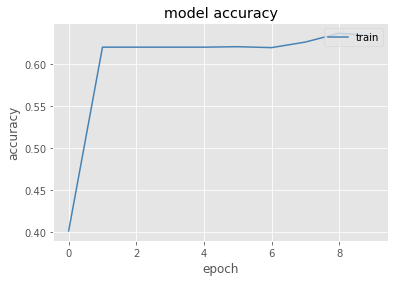

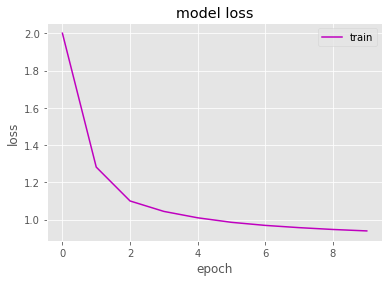

In [110]:
# print the labels of the history contents:
print(history.history.keys())

# graph the results for the one fold model
# summarize history for accuracy
plt.plot(history.history['acc'], color = 'steelblue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], color = 'm')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

## now train the model using all the folds:
Train the model on the k folds. See what kind of profiles the loss and accuracy curves take¶

W0317 23:27:07.360575 4531135936 deprecation.py:506] From /Users/jenylmurdock/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Training on fold 0 ...
Training on fold 1 ...
Training on fold 2 ...
Training on fold 3 ...
Training on fold 4 ...
Training on fold 5 ...
Training on fold 6 ...
Training on fold 7 ...
Training on fold 8 ...
Training on fold 9 ...


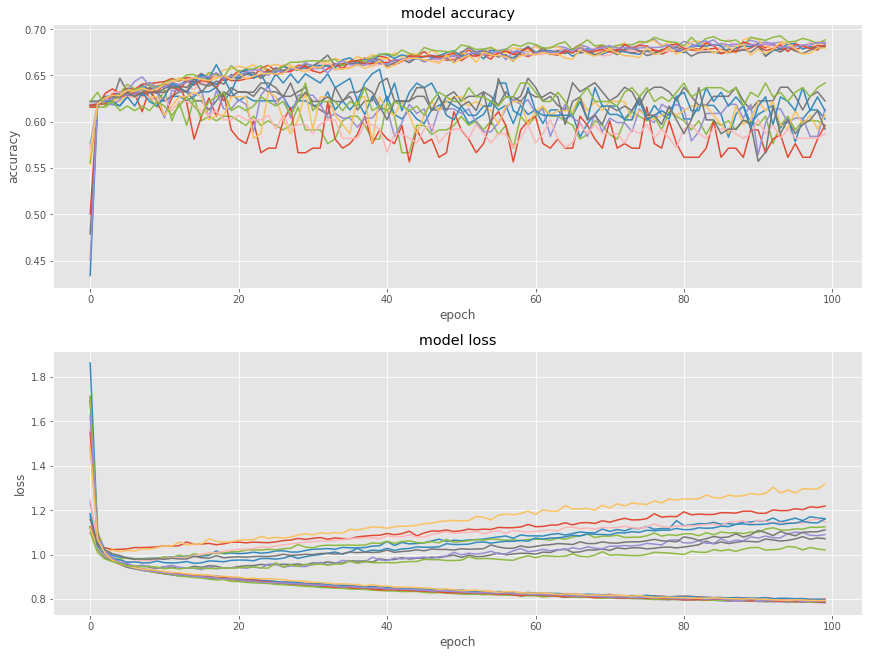

In [111]:
fig, axs = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(kfold_data[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, test_indices = fold_ind[0], fold_ind[1]
    train_data = features_data.iloc[train_indices]
    train_labels = data['damage_level'].iloc[train_indices]
    test_data = features_data.iloc[test_indices]
    test_labels = data['damage_level'].iloc[test_indices]
    
    model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data.values,
                        train_labels.values,
                        epochs=100,
                        batch_size=16,
                        validation_data=(test_data.values, test_labels.values),
                        verbose=0
                       )
    
    # summarize history for accuracy
    axs[0].plot(history.history['acc'], label='acc_'+str(i))
    axs[0].plot(history.history['val_acc'], label='val_acc_'+str(i))

    # summarize history for loss
    axs[1].plot(history.history['loss'], label='loss_'+str(i))
    axs[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].grid(True, which='major')
# axs[0].legend(loc='upper left')

axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].grid(True, which='major')
# axs[1].legend(loc='upper left')

In [112]:
# print the loss and accuracy for the training data

model.evaluate(train_data.values, train_labels.values)

1820/1820 [==============================] - 0s 37us/sample - loss: 0.7750 - acc: 0.6852


[0.7749970052268479, 0.6851648]

In [113]:
# print the accuracy for the testing data

model.evaluate(test_data.values, test_labels.values)

201/201 [==============================] - 0s 67us/sample - loss: 1.0209 - acc: 0.6418


[1.0209420783009695, 0.64179105]

### Let's try to use regularization & dropout and see if that gives us better results


Training on fold 0 ...
Training on fold 1 ...
Training on fold 2 ...
Training on fold 3 ...
Training on fold 4 ...
Training on fold 5 ...
Training on fold 6 ...
Training on fold 7 ...
Training on fold 8 ...
Training on fold 9 ...
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
Test Accuracy =  [0.62189054, 0.62189054, 0.6268657, 0.6169154, 0.6169154, 0.62189054, 0.62189054, 0.62189054, 0.62189054, 0.6169154, 0.6169154, 0.6169154, 0.6169154, 0.6169154, 0.62189054, 0.62189054, 0.6268657, 0.62189054, 0.62189054, 0.6169154, 0.6268657, 0.6268657, 0.62189054, 0.62189054, 0.6169154, 0.6169154, 0.6119403, 0.6169154, 0.62189054, 0.62189054, 0.6169154, 0.62189054, 0.6318408, 0.62189054, 0.6119403, 0.6119403, 0.6268657, 0.6069652, 0.6268657, 0.6318408, 0.6318408, 0.6318408, 0.62189054, 0.62189054, 0.62189054, 0.6119403, 0.6169154, 0.62189054, 0.62189054, 0.6268657, 0.6169154, 0.62189054, 0.6268657, 0.6318408, 0.6169154, 0.6169154, 0.62189054, 0.6318408, 0.6268657, 0.6318408, 0.6268657, 0.621890

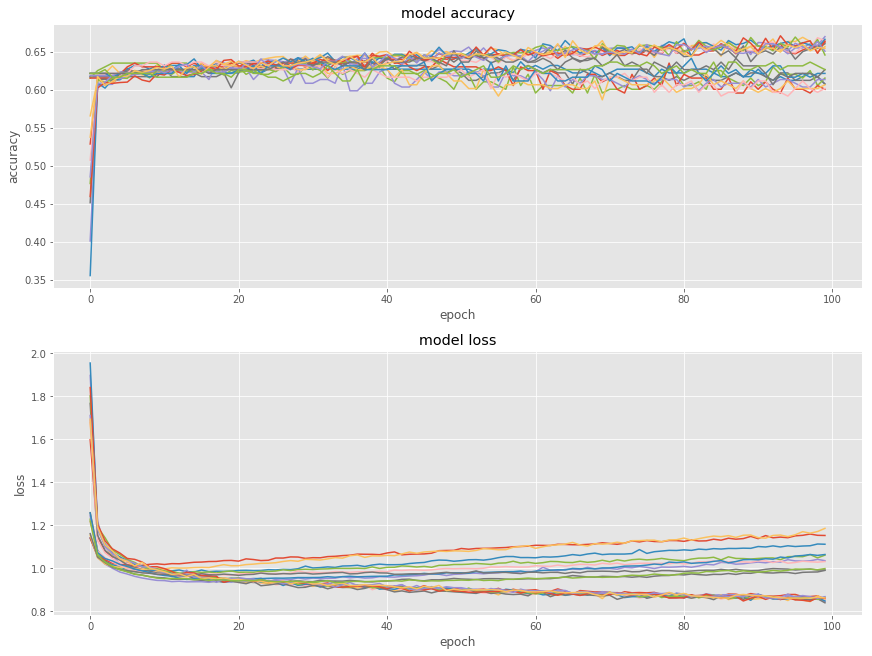

In [114]:
fig, axs = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(kfold_data[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, test_indices = fold_ind[0], fold_ind[1]
    train_data = features_data.iloc[train_indices]
    train_labels = target_data.iloc[train_indices]
    test_data = features_data.iloc[test_indices]
    test_labels = target_data.iloc[test_indices]
    
    model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data.values,
                        train_labels.values,
                        epochs=100,
                        batch_size=16,
                        validation_data=(test_data.values, test_labels.values),
                        verbose=0
                       )

    # summarize history for accuracy
    axs[0].plot(history.history['acc'], label='acc_'+str(i))
    axs[0].plot(history.history['val_acc'], label='val_acc_'+str(i))

    # summarize history for loss
    axs[1].plot(history.history['loss'], label='loss_'+str(i))
    axs[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].grid(True, which='major')

axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].grid(True, which='major')

print(history.history.keys())
print('Test Accuracy = ', history.history['val_acc'])

In [115]:
# print the loss and accuracy for the training data

model.evaluate(train_data.values, train_labels.values)

1820/1820 [==============================] - 0s 49us/sample - loss: 0.8167 - acc: 0.6753


[0.8167301010299515, 0.6752747]

In [116]:
# print the accuracy for the testing data

test_loss, test_acc = model.evaluate(test_data.values, test_labels.values)

print('\nTest accuracy:', test_acc)

201/201 [==============================] - 0s 82us/sample - loss: 0.9995 - acc: 0.6269

Test accuracy: 0.6268657


Training on fold 0 ...
Training on fold 1 ...
Training on fold 2 ...
Training on fold 3 ...
Training on fold 4 ...
Training on fold 5 ...
Training on fold 6 ...
Training on fold 7 ...
Training on fold 8 ...
Training on fold 9 ...


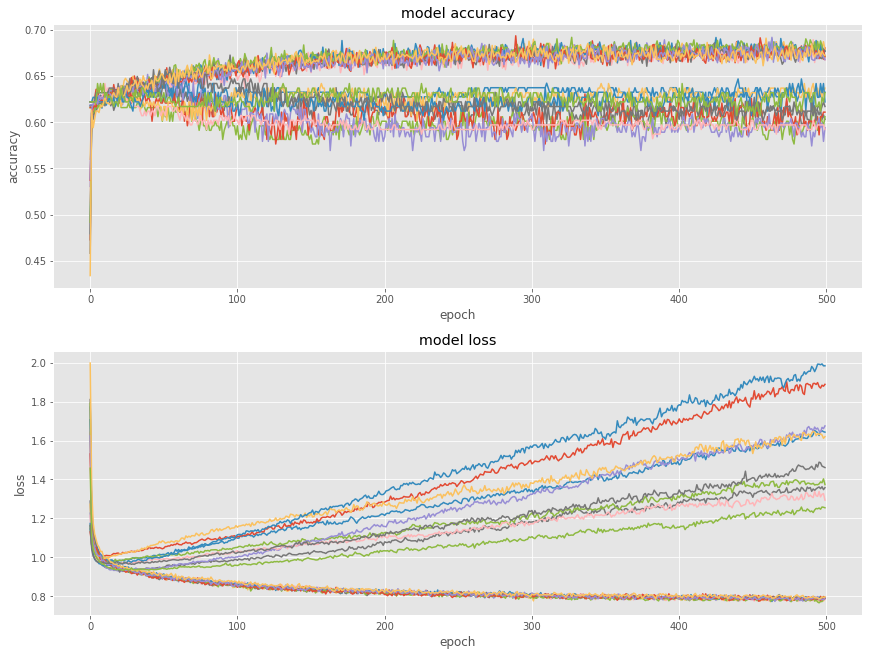

In [117]:
fig, axs = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(kfold_data[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, test_indices = fold_ind[0], fold_ind[1]
    train_data = features_data.iloc[train_indices]
    train_labels = target_data.iloc[train_indices]
    test_data = features_data.iloc[test_indices]
    test_labels = target_data.iloc[test_indices]
    
    model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data.values,
                        train_labels.values,
                        epochs=500,
                        batch_size=16,
                        validation_data=(test_data.values, test_labels.values),
                        verbose=0
                       )
    
    # summarize history for accuracy
    axs[0].plot(history.history['acc'], label='acc_'+str(i))
    axs[0].plot(history.history['val_acc'], label='val_acc_'+str(i))

    # summarize history for loss
    axs[1].plot(history.history['loss'], label='loss_'+str(i))
    axs[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].grid(True, which='major')
# axs[0].legend(loc='upper left')

axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].grid(True, which='major')
# axs[1].legend(loc='upper left')

In [118]:
# print the loss and accuracy for the training data

model.evaluate(train_data.values, train_labels.values)

1820/1820 [==============================] - 0s 85us/sample - loss: 0.7445 - acc: 0.6907


[0.7445355605293106, 0.69065934]

In [119]:
# print the accuracy for the testing data

test_loss, test_acc = model.evaluate(test_data.values, test_labels.values)

print('\nTest accuracy:', test_acc)

201/201 [==============================] - 0s 118us/sample - loss: 1.2545 - acc: 0.6318

Test accuracy: 0.6318408


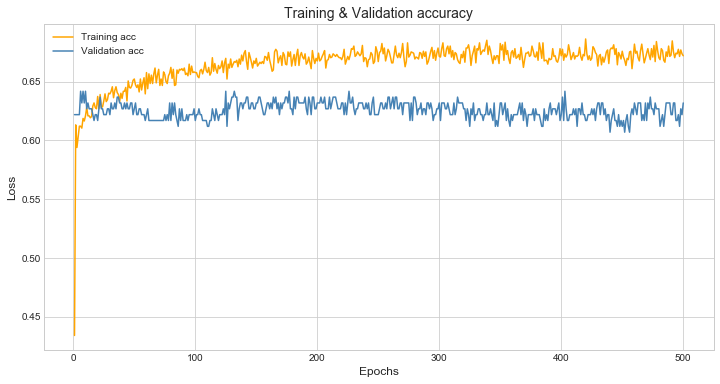

In [120]:
# https://github.com/arseniyturin/dsc-4-final-project-online-ds-sp-000/blob/master/student.ipynb

epochs = range(1, len(history.history['acc']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history.history['acc'], 'orange', label='Training acc')
plt.plot(epochs, history.history['val_acc'], 'steelblue', label='Validation acc')
plt.title('Training & Validation accuracy', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

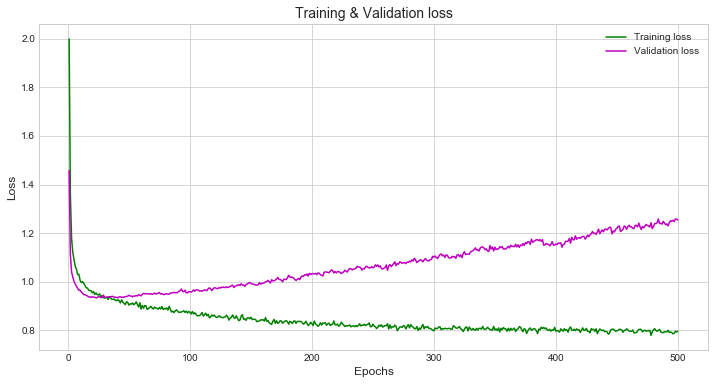

In [121]:
# https://github.com/arseniyturin/dsc-4-final-project-online-ds-sp-000/blob/master/student.ipynb

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history.history['loss'], 'g', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'm', label='Validation loss')

plt.title('Training & Validation loss',fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [122]:
y_hat = model.predict(X)
y_hat

array([[1.9407395e-01, 4.5418851e-02, 5.3448160e-03, ..., 1.1471104e-14,
        2.3097340e-14, 4.8445321e-15],
       [8.4646933e-02, 2.1611567e-01, 1.1828610e-01, ..., 1.1996342e-08,
        1.5110690e-08, 1.3350762e-08],
       [6.7305460e-04, 2.4586701e-01, 9.8858349e-05, ..., 5.0079474e-24,
        2.7615319e-22, 7.4675719e-24],
       ...,
       [2.4192866e-04, 3.6813360e-01, 2.6265841e-03, ..., 1.5392644e-22,
        5.5490309e-21, 2.5787858e-22],
       [4.5076719e-01, 1.0170364e-01, 2.2432948e-03, ..., 9.6753228e-16,
        1.4614359e-15, 4.3365736e-16],
       [3.3168558e-02, 1.5729399e-01, 6.6566437e-02, ..., 2.5279633e-11,
        3.9564123e-11, 2.5950299e-11]], dtype=float32)

In [123]:
# final evaluation for the training data

model.evaluate(train_data.values, train_labels.values)

1820/1820 [==============================] - 0s 62us/sample - loss: 0.7445 - acc: 0.6907


[0.7445355605293106, 0.69065934]

In [124]:
# final evaluation for the testing data
model.evaluate(test_data.values, test_labels.values)

201/201 [==============================] - 0s 143us/sample - loss: 1.2545 - acc: 0.6318


[1.2544577465721625, 0.6318408]

## Conclusion:

# Work for Further Consideration